# import lib

In [35]:
import pandas
import psycopg2
import configparser

# connect to db

In [36]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [37]:
cur=conn.cursor()

# Q1

In [4]:
sql_q1="""
    select * from gp27.student
    """

In [5]:
df_student=pandas.read_sql_query('select * from gp27.student',conn)
df_student[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,IA
5,s6@jmu.edu,s6,IA
6,s7@jmu.edu\n,s7,IA
7,s8@jmu.edu,s8,IA
8,s9@jmu.edu,s9,IA
9,s10@jmu.edu,s10,IA


# Q2

In [7]:
sql_q2="""
    select gp27.professor.p_name,
            gp27.course.c_name
    from gp27.professor
    inner join gp27.course
on gp27.professor.p_email = gp27.course.p_email 
    """

In [8]:
df_student=pandas.read_sql_query(sql_q2,conn)
df_student[:]

,p_name,c_name
0,xuebin wei,Data Mining
1,noel hendrickson,counterfactual
2,timothy walton,counter_terror
3,Stephen Marrin,sem_ia
4,MR Teacher,IA Stuff


# Q3

In [14]:
sql_q3="""
    select c_number, count (*) as num_enrolled
    from gp27.enroll_list
    group by c_number
    order by num_enrolled  
    """

<AxesSubplot:xlabel='c_number'>

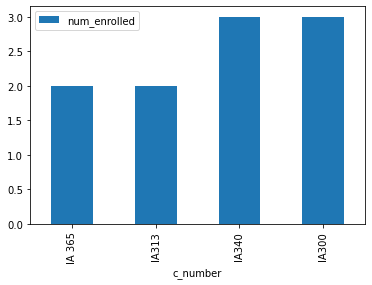

In [16]:
df_price=pandas.read_sql_query(sql_q3,conn)

df_price.plot.bar(x='c_number',y='num_enrolled')

# Q4 

In [19]:
sql_q4= """
                select gp27.professor.p_name,
                count (*) as num_teaching
                from gp27.professor
                inner join gp27.course
                on gp27.professor.p_email = gp27.course.p_email
                group by gp27.professor.p_name
                order by num_teaching 
                """

<AxesSubplot:xlabel='p_name'>

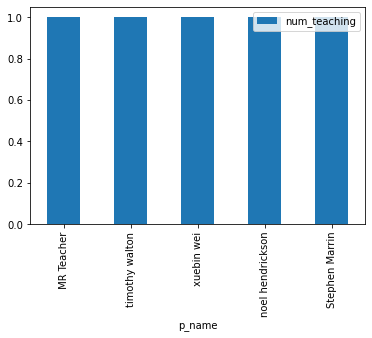

In [20]:
df_price=pandas.read_sql_query(sql_q4,conn)

df_price.plot.bar(x='p_name',y='num_teaching')

# Q 5

In [26]:
sql_q5= """
                insert into gp27.professor(p_email,p_name,office)
                values ('MRteacher@jmu.edu','MR Teacher','ISAT2715')
                """

In [27]:
cur.execute(sql_q5)

ProgrammingError: syntax error at or near "select"
LINE 4:                 select (*) from gp27.professor 
                        ^


In [28]:
conn.rollback()

In [29]:
sql_q5= """
                insert into gp27.professor(p_email,p_name,office)
                values ('MRteacher@jmu.edu','MR Teacher','ISAT2715')
                """

In [41]:
cur.execute(sql_q5)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(MRteacherLab4@jmu.edu) already exists.


In [31]:
conn.rollback()

In [32]:
sql_q5= """
                insert into gp27.professor(p_email,p_name,office)
                values ('MRteacherLab4@jmu.edu','MR Teacher Lab 4','ISAT0521')
                """

In [33]:
cur.execute(sql_q5)

In [34]:
conn.commit()

In [40]:
df_student=pandas.read_sql_query('select * from gp27.professor',conn)
df_student[:]

,p_email,p_name,office
0,weixx@jmu.edu,xuebin wei,hhs112
1,hendrinx@jmu.edu,noel hendrickson,Virtual
2,waltontr@jmu.edu,timothy walton,hhs326
3,marrinsp@jmu.edu,Stephen Marrin,engeo 2104
4,MRteacher@jmu.edu,MR Teacher,ISAT2715
5,MRteacherLab4@jmu.edu,MR Teacher Lab 4,ISAT0521


# Q6 

In [50]:
sql_q6= """
                update gp27.course
                set p_email ='MRteacherLab4@jmu.edu'
                where p_email ='MRteacher@jmu.edu'
                """

In [51]:
cur.execute(sql_q6)

In [52]:
conn.rollback()

In [53]:
conn.commit()

In [54]:
sql_q6_2= """
                delete from gp27.professor
                where p_email ='MRteacher@jmu.edu'
                """

In [55]:
cur.execute(sql_q6_2)

In [56]:
conn.commit()

In [58]:
df_student=pandas.read_sql_query('select * from gp27.course',conn)
df_student[:]

,c_number,c_name,room,p_email
0,IA340,Data Mining,hhs112,weixx@jmu.edu
1,IA313,counterfactual,Virtual,hendrinx@jmu.edu
2,IA 365,counter_terror,hss 326,waltontr@jmu.edu
3,IA300,sem_ia,engeo 2104,marrinsp@jmu.edu
4,IA 500,IA Stuff,ISAT2715,MRteacherLab4@jmu.edu


In [59]:
df_student=pandas.read_sql_query('select * from gp27.professor',conn)
df_student[:]

,p_email,p_name,office
0,weixx@jmu.edu,xuebin wei,hhs112
1,hendrinx@jmu.edu,noel hendrickson,Virtual
2,waltontr@jmu.edu,timothy walton,hhs326
3,marrinsp@jmu.edu,Stephen Marrin,engeo 2104
4,MRteacherLab4@jmu.edu,MR Teacher Lab 4,ISAT0521


In [38]:
cur.close()

In [39]:
conn.close()